# *A given population starts with 50 men and 50 women, but there is a preference for having daughters, so the couples keep having children until they have a daughter. What would happen in the long term?*

Approach:
1. Make a starting point, with a 50M and 50W of 20Y each
2. Simulate what will happen if couples still having kids until they have a daughter (and then stop)
3. Analyze results

Assumptions for the simplest case scenario:
1. The couples can have kids from time 0 to time 30 (from age 20 to age 50)
2. The outcome of S (son) or D (daughter) is random and has the same probability of occurrence
3. There is no interference with people from 1st to the 2nd generation (i.e., one guy from the 1st generation can't have a kid with a women from the 2nd generation)
4. Heteronorm (i.e., only a couple conformed by a woman and a man can have a child, and there are no single mother/single parent)
5. There is no mortality during the 20-50 age range
6. Every couple has at least one child
7. Brothers and sisters can't conform a couple (tbd)

### simulation for 1st generation

In [58]:
#imports
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as tck
from collections import Counter

m0, w0 = 50, 50 # starting amoun of men and women

nc = m0 # initial amount of couples in population

rn = np.random.randint(0,2,size=(nc,1)) # random vector of 0s (boy) & 1s (daughter), i.e., 1st children occurrance
children = rn.tolist() # vector to save amount of children

# Let's simmulate up to the 1st generation, i.e., with the initial 50 couples, that keep having children until 
# they get a daughter
nm, nw = 0, 0 
for j in range(len(children)): # loop on children
    for i in range(30): # one of the assumptions is that couples can have children up to 50Y old, 
                        # but we can relax this assumption and use
                        # a 'while' loop instead of a 'for' one, to account that every couple has a child, even though
                        # it's extremely unlikely not to have a daughter in 30 random occurrances of 0s and 1s, 10 
                        # should be enough
        if children[j][-1] == 1: # if it's a daughter, break
            nw+=1
            break
        else: # if it's a boy, keep having a child
            nm+=1
            children[j].append(np.random.randint(2))           

Plot of # of childs/couple for the 1st generation

Text(0, 0.5, 'Number of childs')

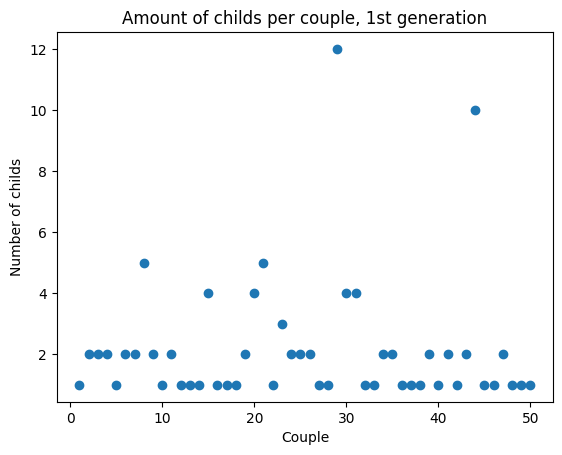

In [59]:
plt.scatter(np.arange(1,nc+1),[len(i) for i in children])
plt.title('Amount of childs per couple, 1st generation')
plt.xlabel('Couple')
plt.ylabel('Number of childs')

Plot of # of men & women for the 1st generation

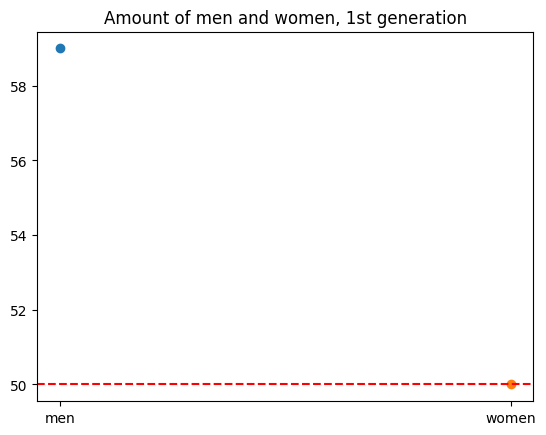

In [60]:
plt.scatter('men',nm)
plt.scatter('women',nw)
plt.title('Amount of men and women, 1st generation')
plt.axhline(y=50,linestyle='--',c='r')

For this run, no couple had more than 12 childs in total, and there are fewer couples for the next generation

Let's run for the 2nd generation

In [61]:
nc = min(nm, nw) # amount of couples in population

rn = np.random.randint(0,2,size=(nc,1)) # random vector of 0s (boy) & 1s (daughter), i.e., 1st children occurrance
children = rn.tolist() # vector to save amount of children

# Let's simmulate up to the 2nd generation, i.e., with the initial 50 couples again, that keep having children until 
# they get a daughter
nm, nw = 0, 0 
for j in range(len(children)): # loop on children
    for i in range(30): # one of the assumptions is that couples can have children up to 50Y old
        if children[j][-1] == 1: # if it's a daughter, stop
            nw+=1
            break
        else: # if it's a boy, keep having a child
            nm+=1
            children[j].append(np.random.randint(2))      

Text(0, 0.5, 'Number of childs')

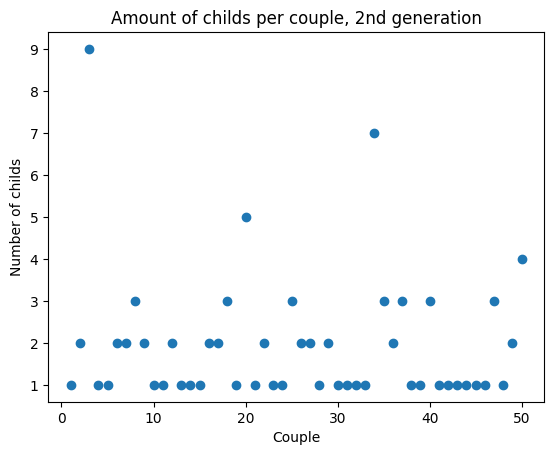

In [62]:
plt.scatter(np.arange(1,nc+1),[len(i) for i in children])
plt.title('Amount of childs per couple, 2nd generation')
plt.xlabel('Couple')
plt.ylabel('Number of childs')

In [63]:
population = sum([len(i) for i in children])
population 

98

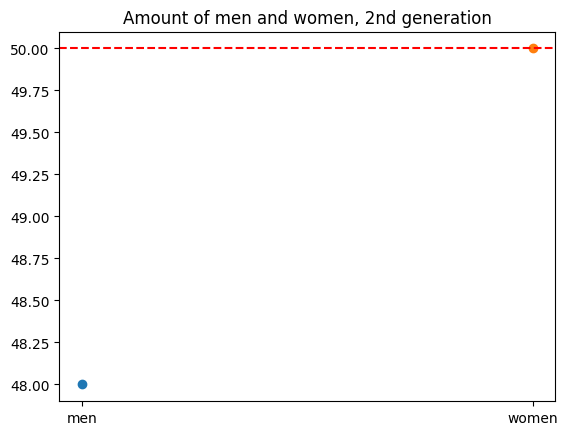

In [64]:
plt.scatter('men',nm)
plt.scatter('women',nw)
plt.title('Amount of men and women, 2nd generation')
plt.axhline(y=50,linestyle='--',c='r')

There will always be nc (each couple has one daughter) women for the next generation, but there could be more or fewer men. With just two runs, we saw a decline in population, so this culture will not last long. 

Now let's run it until it's over

In [65]:
k = 0 # starting number of generations
nc = 50 # starting amount of couples in population
nm, nw = 50, 50 # starting amount of men&women in population
ncs = [] # to save couples/generation
nms = [] # to save men/generation
nws = [] # to save women/generation
while nc>0: # loop until there are no couples left
    k+=1 # increase generation

    nc = min(nm, nw) 
    ncs.append(nc)
    nms.append(nm)
    nws.append(nw)
            
    nm, nw = 0, 0 # for the next generation, start with 0 children
    for j in range(nc): # loop on couples
        rn = [np.random.randint(0,2)] # random vector of 0s (son) & 1s (daughter)
        if rn[-1]==1:
            nw+=1
        else:
            nm+=1
        for i in range(30): # one of the assumptions is that couples can have children up to 50Y old                            
            if rn[-1]== 1: # if it's a daughter, stop
                break
            else: # if it's a son, keep having children
                rn.append(np.random.randint(0,2))
                if rn[-1]==1:
                    nw+=1
                else:
                    nm+=1

In [66]:
print(f'After {k} generations, population is over')

After 19 generations, population is over


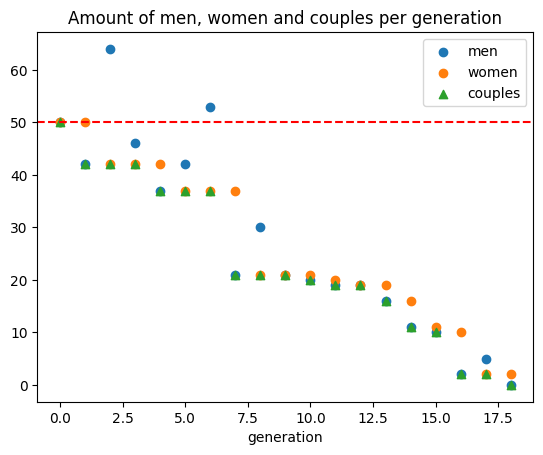

In [67]:
plt.scatter(np.arange(k),nms,label='men')
plt.scatter(np.arange(k),nws, label='women')
plt.scatter(np.arange(k),ncs, marker='^', label='couples')
plt.title('Amount of men, women and couples per generation')
plt.xlabel('generation')
plt.legend()
plt.axhline(y=50,linestyle='--',c='r')

With this simplified simulation, is there a way to have a growing population? What if couples would have had at least 2 children? And okay, if there is at least one girl, then stop having children, but if not, keep having them until there is at least one girl.

In [68]:
N = 10 # number of generations
nc = 50 # amount of couples in population
nm, nw = 50, 50
k = 0
ncs = []
nms = []
nws = []
for k in range(1, N): 
    nc = min(nm, nw)
    ncs.append(nc)
    nms.append(nm)
    nws.append(nw)
    if nc==0:
        break
    nw,nm=0,0
    for j in range(nc): # loop on couples
        rn = np.random.randint(0,2,size=2).tolist() # random vector of 0s (boy) & 1s (daughter), i.e., 1st children occurrance
        nw+= sum(rn)
        nm+= 2 - sum(rn)
        for i in range(30): 
            if sum(rn) > 0: # if there's at least one daughter, break
                break
            else: # keep having children
                rn.append(np.random.randint(0,2))
                if rn[-1]==0:
                    nm+=1
                else:
                    nw+=1

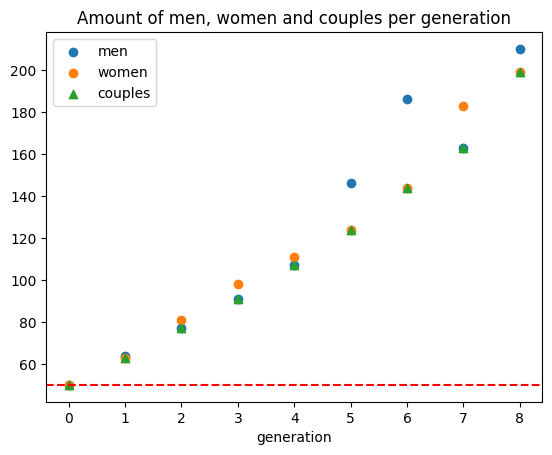

In [69]:
plt.scatter(np.arange(k),nms,label='men')
plt.scatter(np.arange(k),nws, label='women')
plt.scatter(np.arange(k),ncs, marker='^', label='couples')
plt.title('Amount of men, women and couples per generation')
plt.xlabel('generation')
plt.legend()
plt.axhline(y=50,linestyle='--',c='r')

Ok, in that way, the population will grow.

So what's needed to prevent the population from disappearing and how does the growth rate change? What if couples are asked to have at least a boy and a girl? Let's plot the number of w&m for all 3 cases:

1. couples have at least one child and keep having children until they get a daughter
2. couples have at least two children and keep having children until they get a daughter
3. couples have at least two children and keep having children until they get a daughter and a son

### 1. couples have at least one child and keep having children until they get a daughter

In [70]:
N = 10 # generations
nc = 50 # starting amount of couples in population
nm, nw = 50, 50 # starting amount of men&women in population

nms1 = [] # to save men/generation
nws1 = [] # to save women/generation
for k in range(N):

    nc = min(nm, nw) 

    nms1.append(nm)
    nws1.append(nw)
            
    nm, nw = 0, 0 # for the next generation, start with 0 children
    for j in range(nc): # loop on couples
        rn = [np.random.randint(0,2)] # random vector of 0s (son) & 1s (daughter)
        if rn[-1]==1:
            nw+=1
        else:
            nm+=1
        for i in range(30): # one of the assumptions is that couples can have children up to 50Y old                            
            if rn[-1]== 1: # if it's a daughter, stop
                break
            else: # if it's a son, keep having children
                rn.append(np.random.randint(0,2))
                if rn[-1]==1:
                    nw+=1
                else:
                    nm+=1

### 2. couples have at least two children and keep having children until they get a daughter

In [71]:
nc = 50 # amount of couples in population
nm, nw = 50, 50
k = 0

nms2 = []
nws2 = []
for k in range(N): 
    nc = min(nm, nw)

    nms2.append(nm)
    nws2.append(nw)
    if nc==0:
        break
    nw,nm=0,0
    for j in range(nc): # loop on couples
        rn = np.random.randint(0,2,size=2).tolist() # random vector of 0s (boy) & 1s (daughter), i.e., 1st children occurrance
        nw+= sum(rn)
        nm+= len(rn) - sum(rn)
        for i in range(30): 
            if sum(rn) > 0: # if there's at least one daughter, break
                break
            else: # keep having children
                rn.append(np.random.randint(0,2))
                if rn[-1]==0:
                    nm+=1
                else:
                    nw+=1


### 3. couples have at least two children and keep having children until they get a daughter and a son

In [72]:
nc = 50 # amount of couples in population
nm, nw = 50, 50
k = 0

nms3 = []
nws3 = []
for k in range(N): 
    nc = min(nm, nw)

    nms3.append(nm)
    nws3.append(nw)
    if nc==0:
        break
    nw,nm=0,0
    for j in range(nc): # loop on couples
        rn = np.random.randint(0,2,size=2).tolist() # random vector of 0s (boy) & 1s (daughter), i.e., 1st children occurrance
        nw+= sum(rn)
        nm+= len(rn) - sum(rn)
        for i in range(30): 
            if (0 in set(rn)) and (1 in set(rn)): # if there's at least one daughter and one son, break
                break
            else: # keep having children
                rn.append(np.random.randint(0,2))
                if rn[-1]==0:
                    nm+=1
                else:
                    nw+=1
  

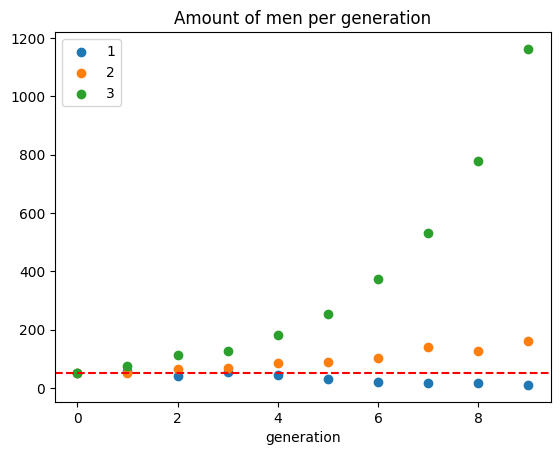

In [73]:
plt.scatter(np.arange(N),nms1,label='1')
plt.scatter(np.arange(N),nms2,label='2')
plt.scatter(np.arange(N),nms3,label='3')
plt.title('Amount of men per generation')
plt.xlabel('generation')
plt.legend()
plt.axhline(y=50,linestyle='--',c='r')

In [74]:
nms3,nws3

([50, 76, 111, 126, 180, 253, 374, 531, 778, 1162],
 [50, 63, 92, 147, 180, 265, 399, 602, 843, 1168])

In [75]:
nms2,nws2

([50, 50, 63, 68, 85, 87, 103, 139, 127, 159],
 [50, 63, 64, 79, 79, 98, 110, 130, 175, 163])

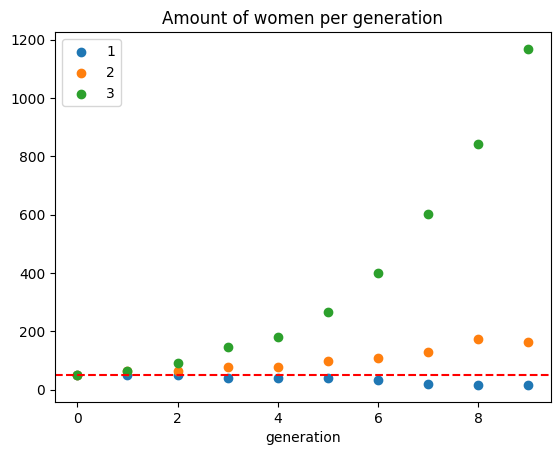

In [76]:
plt.scatter(np.arange(N),nws1,label='1')
plt.scatter(np.arange(N),nws2,label='2')
plt.scatter(np.arange(N),nws3,label='3')
plt.title('Amount of women per generation')
plt.xlabel('generation')
plt.legend()
plt.axhline(y=50,linestyle='--',c='r')

### Summary

Starting with 50 men and 50 women and forcing couples to have children until they get a daughter, even though there's only one child per couple, would make the population disappear soon. Having at least 2 children per couple will make the population grow, independently of the son/daughter preference. If the daughter's preference remains, the growth wouldn't be as fast as if couples were forced to have at least one son and one daughter.